In this notebook, we explore solving Initial value problems with Laplace transform. We utilize the `sympy` library.

In [1]:
%pip install sympy_plot_backends[all]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.6/125.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.7/515.7 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.8/363.8 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.3 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Fou

In [2]:
# import libraries for computing and visualization
import sympy
from spb import *
sympy.init_printing()

import matplotlib.pyplot as plt
%matplotlib inline

sympy.init_printing()
from sympy import Function, laplace_correspondence, diff, solve, laplace_initial_conds, inverse_laplace_transform, laplace_transform, I
from sympy.abc import k, m, r, v

## We can use Laplace transform to solve differential equations, together with initial conditions. By hand, the steps include:

1. Transform the original differential equation (about $y$, in $t$) to an algebraic equation about $Y=L\{y\}$, in the variable $s$.

2. Plug in the initial conditions at $y^{(n)}(0)$, and solve for $Y$ algebraically.

3. Read the Laplace transform table, and compute the inverse Laplace transform of $Y$, eventually finding $y$ as a function of $t$.

The IVP to solve is

$m\ y''+r\ y'+k\ y = 0$, with $y(0)=y_0,\ y'(0)=y_1$.

In [3]:
m, r, k, v = 1,2,4,0.3

In [4]:
y = Function('y')
Y = Function('Y')
f = Function('f')
F = Function('F')
t, s = sympy.symbols('t, s')
alpha, omega = sympy.symbols('alpha, omega')

f = m * diff(y(t), t, 2) + r * diff(y(t), t) + k * y(t)
F = laplace_transform(f, t, s, noconds=True)
F = laplace_correspondence(F, {y: Y})
F = laplace_initial_conds(F, t, {y: [0, v]})
Ys = solve(F, Y(s))[0]
res = inverse_laplace_transform(Ys, s, t)
res

                   -1.0⋅t                             
0.173205080756888⋅ℯ      ⋅sin(1.73205080756888⋅t)⋅θ(t)

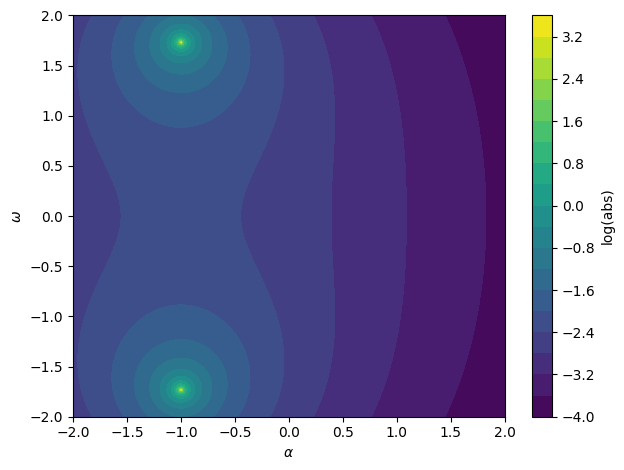

In [5]:
colorscale = [
    [0, 'green'],
    [0.01, 'orange'],
    [0.05, 'red'],
    [1, 'red']
]
plot3d(
    abs(Ys.subs(s, alpha + I * omega)), (alpha, -2, 2), (omega, -2, 2),
    {"colorscale": colorscale},
    backend=PB, size=(600, 600), zlim=(0, 10),
    use_cm=True, colorbar=False, wireframe=True, zlabel="|Y(s)|"
)

plot_contour(
    sympy.log(abs(Ys.subs(s, alpha + I * omega))), (alpha, -2, 2), (omega, -2, 2),
    "log(abs)", {"levels": 20},
    grid=False, n=300)